# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "C:/Users/erick.lopez/OneDrive - Seaboard Marine Ltd/Desktop/Analysis Projects/6th Project/PyBer_Analysis/Resources/city_data.csv"
ride_data_to_load = "C:/Users/erick.lopez/OneDrive - Seaboard Marine Ltd/Desktop/Analysis Projects/6th Project/PyBer_Analysis/Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare_ride = total_fares / total_rides
avg_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_driver_fare = total_fares / total_drivers
avg_driver_fare

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_type_summary_df = pd.DataFrame({
          "Total Rides" : total_rides ,
          "Total Drivers": total_drivers ,
          "Total Fares": total_fares,
          "Average Fare per Ride": avg_fare_ride,
          "Average Fare per Driver": avg_driver_fare})
pyber_type_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_type_summary_df.index.name = None

In [10]:
#  8. Format the columns.

pyber_type_summary_df["Total Rides"] = pyber_type_summary_df["Total Rides"].map("{:.0f}".format)
pyber_type_summary_df["Total Drivers"] = pyber_type_summary_df["Total Drivers"].map("{:.0f}".format)
pyber_type_summary_df["Total Fares"] = pyber_type_summary_df["Total Fares"].map('${:,.2f}'.format)
pyber_type_summary_df["Average Fare per Ride"] = pyber_type_summary_df["Average Fare per Ride"].map('${:,.2f}'.format)
pyber_type_summary_df["Average Fare per Driver"] = pyber_type_summary_df["Average Fare per Driver"].map('${:,.2f}'.format)
pyber_type_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

pyber_dataframe = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
pyber_dataframe

type   date           
Rural  1/1/2019 9:45      43.69
       1/11/2019 4:39     16.42
       1/14/2019 15:58    54.10
       1/14/2019 7:09     18.05
       1/15/2019 21:44    30.26
                          ...  
Urban  5/8/2019 1:54      32.69
       5/8/2019 2:31      41.33
       5/8/2019 4:20      21.99
       5/8/2019 4:39      18.45
       5/8/2019 7:29      18.55
Name: fare, Length: 2364, dtype: float64

In [12]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_dataframe = pyber_dataframe.reset_index()

In [13]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_dataframe = pyber_data_df.pivot(index ='date',columns = 'type', values = 'fare')
pyber_dataframe.head()

ValueError: Index contains duplicate entries, cannot reshape

In [14]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pyber_dataframe = pyber_dataframe.loc["2019-01-01":"2019-04-29"]
pyber_dataframe.head()

,type,date,fare


In [15]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pyber_dataframe.index = pd.to_datetime(pyber_dataframe.index)
pyber_dataframe.index

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [16]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   type    0 non-null      object 
 1   date    0 non-null      object 
 2   fare    0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 0.0+ bytes


In [17]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_dataframe = pyber_dataframe.resample('W').sum()
pyber_dataframe.head(10)

,type,date,fare


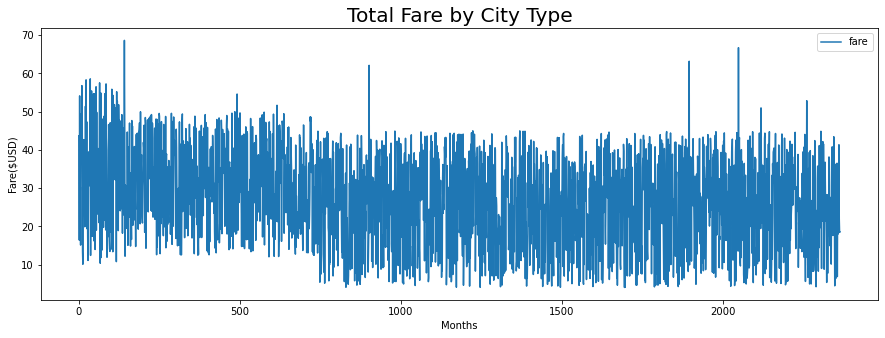

In [13]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
pyber_dataframe.plot(figsize=(15,5))
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.title("Total Fare by City Type")
plt.xlabel("Months")
plt.ylabel("Fare($USD)")
plt.savefig("C:/Users/erick.lopez/OneDrive - Seaboard Marine Ltd/Desktop/Analysis Projects/6th Project/PyBer_Analysis/Resources/PyBer_fare_summary.png")